Author: Anshu Sharma
Project: Sentiment Analysis

In [32]:
# Importing  general necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb

# importing libraries for sentiment analysis
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from textblob import TextBlob
from nltk.util import ngrams
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [2]:
# Read Data sets into the notebook
! unzip /content/drive/MyDrive/dnldtrp.zip



 

Archive:  /content/drive/MyDrive/dnldtrp.zip
  inflating: hashtag_donaldtrump.csv  
  inflating: hashtag_joebiden.csv    


In [3]:
trump_df = pd.read_csv(r"/content/hashtag_donaldtrump.csv",lineterminator='\n')
biden_df = pd.read_csv(r"/content/hashtag_joebiden.csv",lineterminator='\n')

In [4]:
# checking the shapes of data

print(trump_df.shape)
print(biden_df.shape)

(970919, 21)
(776886, 21)


In [5]:
trump_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970919 entries, 0 to 970918
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            970919 non-null  object 
 1   tweet_id              970919 non-null  float64
 2   tweet                 970919 non-null  object 
 3   likes                 970919 non-null  float64
 4   retweet_count         970919 non-null  float64
 5   source                970043 non-null  object 
 6   user_id               970919 non-null  float64
 7   user_name             970903 non-null  object 
 8   user_screen_name      970919 non-null  object 
 9   user_description      869653 non-null  object 
 10  user_join_date        970919 non-null  object 
 11  user_followers_count  970919 non-null  float64
 12  user_location         675966 non-null  object 
 13  lat                   445719 non-null  float64
 14  long                  445719 non-null  float64
 15  

In [6]:
biden_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776886 entries, 0 to 776885
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            776886 non-null  object 
 1   tweet_id              776886 non-null  float64
 2   tweet                 776886 non-null  object 
 3   likes                 776886 non-null  float64
 4   retweet_count         776886 non-null  float64
 5   source                776173 non-null  object 
 6   user_id               776886 non-null  float64
 7   user_name             776868 non-null  object 
 8   user_screen_name      776886 non-null  object 
 9   user_description      694880 non-null  object 
 10  user_join_date        776886 non-null  object 
 11  user_followers_count  776886 non-null  float64
 12  user_location         543095 non-null  object 
 13  lat                   355293 non-null  float64
 14  long                  355293 non-null  float64
 15  

In [7]:
# creating new common column so further we can merge datasets
trump_df["Candidate"] = 'trump'
biden_df['Candidate'] = 'biden'

In [8]:
# concat the two dataframes
Mixed_data = pd.concat([trump_df,biden_df])
Mixed_data.sort_values(by='created_at')
Mixed_data.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at,Candidate
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,2011-08-23 15:33:45,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00,trump
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,2011-07-08 13:12:20,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530,trump
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",2007-08-26 05:56:11,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060,trump
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",2017-02-05 21:32:17,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591,trump
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",2009-06-15 19:05:35,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121,trump


In [9]:
Mixed_data.tail()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at,Candidate
776881,2020-11-08 23:59:38,1.325589e+18,Stop laying @CNN !\n#Paris and #London dont gi...,0.0,0.0,Twitter for iPhone,3.873620e+08,flaquet,flaquet1,NaN,2011-10-08 22:42:56,27.0,PARIS,48.856697,2.351462,Paris,France,Europe,Ile-de-France,IDF,2020-11-09 18:32:45.613547,biden
776882,2020-11-08 23:59:38,1.325589e+18,Ωχ ελπίζω να μη μας βγει σαν τους οπαδούς του...,0.0,0.0,Twitter for Android,4.032819e+08,οχι άλλο κάρβουνο 🇬🇷🗣🗣🗣,anapodoi,ακραία καιρικά φαινόμενα... ζήσαμε και απόψε,2011-11-02 08:39:46,772.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 18:32:45.947617,biden
776883,2020-11-08 23:59:41,1.325589e+18,L'OTAN va sortir de sa léthargie et redevenir ...,48.0,14.0,Twitter for Android,7.819183e+17,🇫🇷 Alt-Droite (matricule 6921) ✝️ 🇬🇷 🇮🇹 🇦🇲,CtrlAltDroite,Fils de mineur. Libertés - Identité - Solidari...,2016-09-30 18:06:56,15806.0,France,46.603354,1.888334,NaN,France,Europe,NaN,NaN,2020-11-09 18:32:45.627335,biden
776884,2020-11-08 23:59:52,1.325589e+18,🌎\n\n“#congiuntifuoriregione”\n\n‘Sono felice ...,1.0,1.0,Twitter for iPhone,5.293315e+08,Angelo Tani,AngeloTani,nato a casa dei nonni,2012-03-19 12:07:06,5974.0,🌎,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 18:32:45.599846,biden
776885,2020-11-08 23:59:58,1.325589e+18,"Ik moet zeggen dat ik #Biden ""the lesser of tw...",0.0,0.0,Twitter for Android,5.863863e+08,Job,_JobO__,-voeg hier uw interessante bio toe-,2012-05-21 06:30:14,119.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 18:32:45.747707,biden


Text(0.5, 1.0, 'Comparison of tweets')

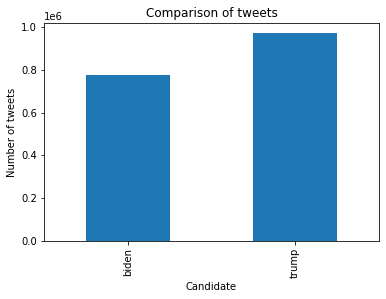

In [10]:
# lets visualise the  distribution of class

Mixed_data.groupby(['Candidate'])['tweet'].count().plot.bar()
plt.ylabel('Number of tweets')
plt.title('Comparison of tweets')

Number of tweets for donald trump are greater than biden.

Text(0.5, 1.0, 'Comparison of number of likes')

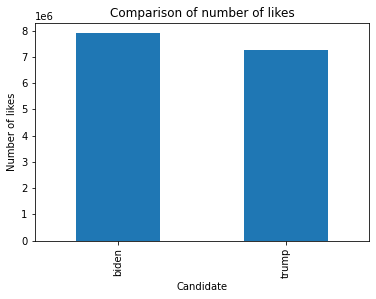

In [11]:
# visualising the number of  liked tweets 
Mixed_data.groupby(['Candidate'])['likes'].sum().plot.bar()
plt.ylabel('Number of likes')
plt.title('Comparison of number of likes')

Although number of tweets for trump are far greater than biden, still number of total likes on biden tweets are greater, which shows there was lot of talk about biden, that too lovable.

In [12]:
Mixed_data.country.value_counts()

United States of America    332495
United States                61905
United Kingdom               58051
India                        40091
Germany                      35379
                             ...  
Kiribati                         2
Lesotho                          1
Saint Lucia                      1
Northern Mariana Islands         1
East Timor                       1
Name: country, Length: 189, dtype: int64

In [13]:
# Since in feature(country), united states of America and United states written different, we are gonna
# replace them by common literal US as both are same
Mixed_data['country'] = Mixed_data['country'].replace({'United States of America': 'US','United States':'US'})

Text(0.5, 1.0, ' Top 10 Country with most tweets')

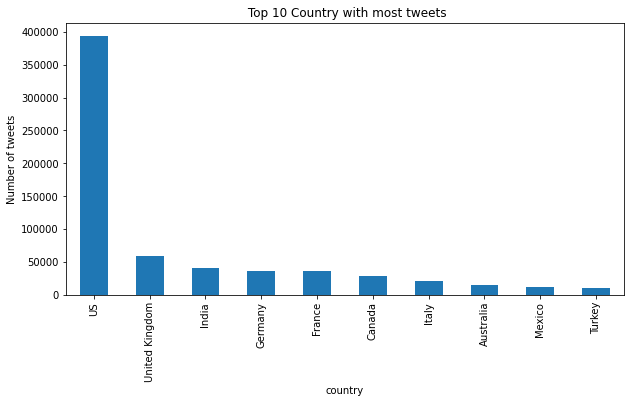

In [14]:
# Countries with highest number of tweets
plt.figure(figsize=(10,5))
Mixed_data.groupby(['country'])['tweet'].count().sort_values(ascending = False).head(10).plot.bar()
plt.ylabel('Number of tweets')
plt.title(' Top 10 Country with most tweets')


As expected most number of tweets are from US as elections are going to be held there, then comes UK and then India.

In [15]:
# List of top 10 countries with highest number of tweets
top10Countries = Mixed_data.groupby('country')['tweet'].count().sort_values(ascending=False).head(10).index.tolist()

In [16]:
# tweets for biden and trump countrywise
df_tweet = Mixed_data.groupby(['country','Candidate'])['tweet'].count().reset_index()

df_tweet = df_tweet[df_tweet['country'].isin(top10Countries)]
df_tweet

,country,Candidate,tweet
16,Australia,biden,5534
17,Australia,trump,9365
54,Canada,biden,10809
55,Canada,trump,16996
112,France,biden,14610
113,France,trump,20689
118,Germany,biden,12761
119,Germany,trump,22618
146,India,biden,21532
147,India,trump,18559


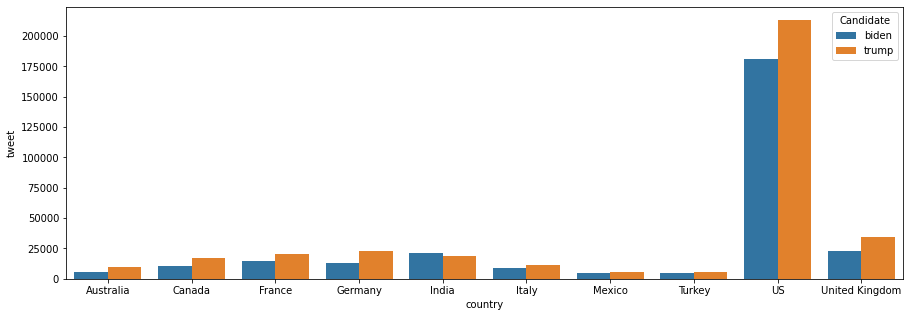

In [17]:
# lets visualise above data for better understanding
plt.figure(figsize=(15,5))
sb.barplot(data= df_tweet,x='country',y='tweet', hue='Candidate')
plt.show()


* As obvious most tweets are from US in which number of tweets for trump is greater.\n
* India is the only country where no of tweets for biden is greater than trump.

In [18]:
#  lets dig deep and evaluate which top  10 states  have most no of votes
df = Mixed_data.groupby(['state'])['tweet'].count().sort_values(ascending=False).head(10)
df

state
California              56966
New York                43886
England                 40854
Texas                   30682
Florida                 29852
District of Columbia    16739
Ile-de-France           16394
Pennsylvania            12414
Illinois                12277
Ontario                 11399
Name: tweet, dtype: int64

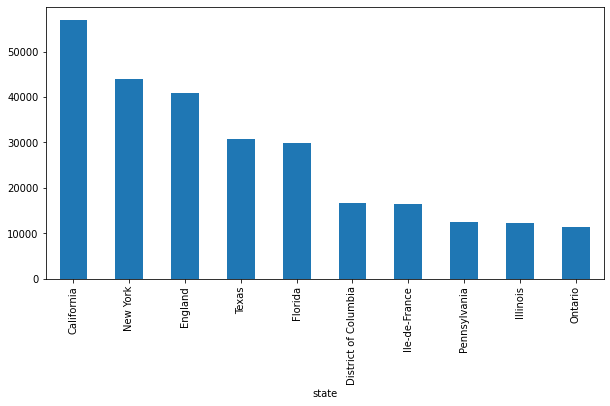

In [19]:
plt.figure(figsize=(10,5))
df.plot.bar()

In [20]:
# Tweets for Biden and Trump from each state in top10 states
top10States = Mixed_data.groupby('state')['tweet'].count().sort_values(ascending=False).head(10).index.tolist()
state_df = Mixed_data.groupby(['state','Candidate'])['tweet'].count().reset_index()

state_df = state_df[state_df['state'].isin(top10States)]

state_df

,state,Candidate,tweet
206,California,biden,25817
207,California,trump,31149
349,District of Columbia,biden,7055
350,District of Columbia,trump,9684
386,England,biden,16743
387,England,trump,24111
410,Florida,biden,13284
411,Florida,trump,16568
518,Ile-de-France,biden,7001
519,Ile-de-France,trump,9393


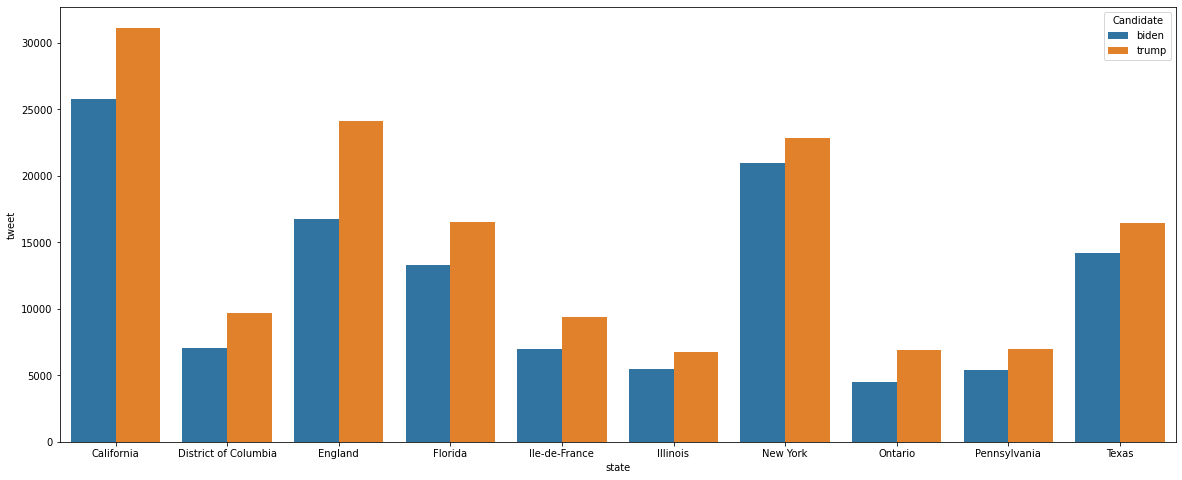

In [21]:
#Plot top 10 states with highest number of tweets for trump and biden
plt.figure(figsize=(20,8))
sb.barplot(data=state_df,x='state',y='tweet',hue='Candidate')
plt.show()


* Here also  its clear that the trump is ahead of biden in criteria of number of tweets.

# Sentiment Analysis of The Presenditial Elections in US

* As elections are going to be held in US we will only focus on sentiment of their people. That is most important for results.

In [22]:
def clean_txt(text):
  # Create function for cleaning the text.
  ''' Make text lowercase, remove text in square brackets, remove links, remove punctuation
  and remove words containing numbers.'''
  text = str(text).lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('https?://\S+|www\.\S+', '', text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)
  text=re.sub(r'@[A-Za-z0-9]+','',text)
  text=re.sub(r'#','',text)
  text=re.sub(r'RT[\s]+','',text)
  text=re.sub(r'[^\w]', ' ', text)
  return text

In [23]:
# create function for subjectivity and polarity
def getsubjectivity(text):
  return TextBlob(text).sentiment.subjectivity
 
def getpolarity(text):
  return TextBlob(text).sentiment.polarity

def getAnalysis(score):
  if score <0:
    return 'negative'
  elif score == 0:
    return 'neutral'
  else:
    return 'positive'

# Sentiment Analysis of Donald Trump Tweets

In [24]:
trump_tweets = Mixed_data.query('(Candidate == "trump")').sort_values('user_followers_count', ascending=False).drop_duplicates(['user_name'])[['tweet','country']]
trump_tweets = trump_tweets.dropna().loc[trump_tweets.country =='US']
trump_tweets.reset_index(inplace=True, drop=True)

trump_tweets['Cleartweet'] = trump_tweets['tweet'].apply(clean_txt)

trump_tweets['Subjectivity'] = trump_tweets['Cleartweet'].apply(getsubjectivity)
trump_tweets['Polarity']     = trump_tweets['Cleartweet'].apply(getpolarity)
trump_tweets['getAnalysis']  = trump_tweets['Polarity'].apply(getAnalysis)

trump_tweets.head()


,tweet,country,Cleartweet,Subjectivity,Polarity,getAnalysis
0,"Without a doubt, the #FourSeasons debacle is t...",US,without a doubt the fourseasons debacle is th...,0.483333,0.333333,positive
1,"President Donald #Trump’s youngest daughter, T...",US,president donald trump s youngest daughter ti...,0.000000,0.000000,neutral
2,Woah. Have you read this article?\n\nAll the p...,US,woah have you read this article all the presi...,0.000000,0.000000,neutral
3,The latest episode of #SNL tackled #DonaldTrum...,US,the latest episode of snl tackled donaldtrump ...,0.800000,-0.033333,negative
4,🇺🇸 #Decision2020: @JoeBiden firmará una serie ...,US,firmará una serie de órdenes ejecutivas ...,0.000000,0.000000,neutral


In [25]:
df = trump_tweets.getAnalysis.value_counts(normalize = True)*100
df

neutral     43.694396
positive    36.258595
negative    20.047009
Name: getAnalysis, dtype: float64

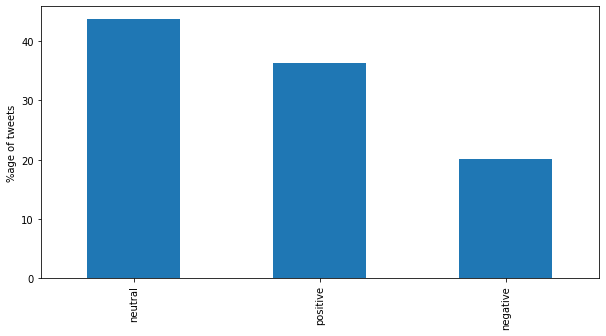

In [26]:
# plot graph for clear analysis of trump tweets
plt.figure(figsize=(10,5))
df.plot.bar()
plt.ylabel("%age of tweets")
plt.show()

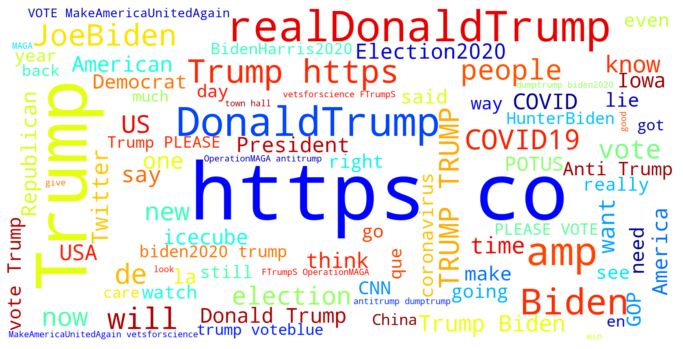

In [27]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=1700,
        height=850,
        random_state=3,
        colormap='jet',
        max_words=85,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");
word_cloud(trump_df['tweet'][:5000])

# Joe Biden tweets sentiment analysis

In [29]:
biden_tweets = Mixed_data.query('(Candidate == "biden")').sort_values('user_followers_count', ascending=False).drop_duplicates(['user_name'])[['tweet','country']]
biden_tweets= biden_tweets.dropna().loc[biden_tweets.country =='US']
biden_tweets.reset_index(inplace=True, drop=True)

biden_tweets['Cleartweet'] = biden_tweets['tweet'].apply(clean_txt)

biden_tweets['Subjectivity'] = biden_tweets['Cleartweet'].apply(getsubjectivity)
biden_tweets['Polarity']     = biden_tweets['Cleartweet'].apply(getpolarity)
biden_tweets['getAnalysis']  = biden_tweets['Polarity'].apply(getAnalysis)

biden_tweets.head()


,tweet,country,Cleartweet,Subjectivity,Polarity,getAnalysis
0,#JoeBiden is enlisting A-list star power to he...,US,joebiden is enlisting a list star power to hel...,0.00,0.00,neutral
1,While we were campaigning across battleground ...,US,while we were campaigning across battleground ...,0.75,0.80,positive
2,The big fight TODAY!!!!! @realDonaldTrump vs #...,US,the big fight today vs joebiden who you ...,0.10,0.00,neutral
3,News outlets have projected that #JoeBiden has...,US,news outlets have projected that joebiden has ...,0.00,0.00,neutral
4,"During his victory speech, #JoeBiden said he u...",US,during his victory speech joebiden said he un...,0.75,-0.75,negative


In [30]:
df1 = biden_tweets.getAnalysis.value_counts(normalize = True)*100
df1

neutral     45.353606
positive    40.000000
negative    14.646394
Name: getAnalysis, dtype: float64

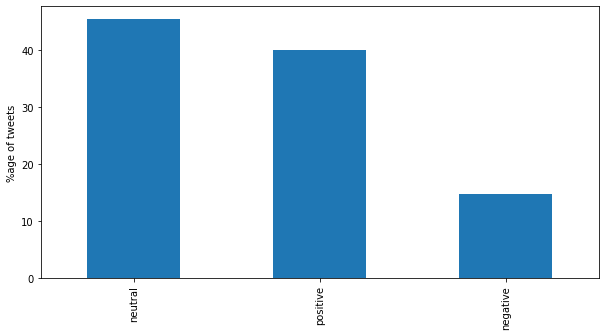

In [33]:
#plot graph for analysis of biden tweets
plt.figure(figsize=(10,5))
df1.plot.bar()
plt.ylabel("%age of tweets")
plt.show()

**Just by comparing positive and negative percentage its clear that biden was favourite for winning elections.**

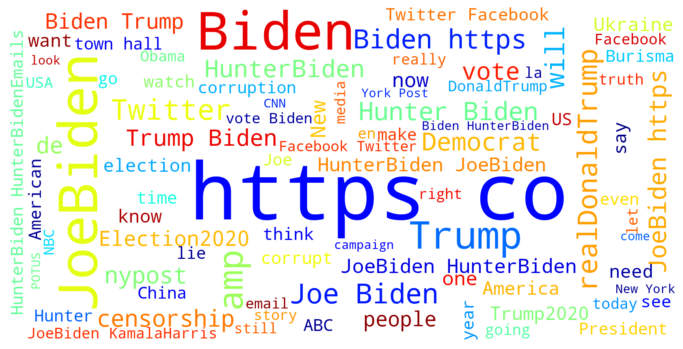

In [31]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=1700,
        height=850,
        random_state=3,
        colormap='jet',
        max_words=85,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");
word_cloud(biden_df['tweet'][:5000])

# Conclusion:

Through sentiment analysis its clear that Biden has upper hand over Trump in US which actually, matters in presedential elections as elections are gonna be held in US.

 **THE END**